#  YeFeng_assignment5

# part 1:

Your assignment is to pick four of the following possibilities and write up a set of comparisons for constructing the same visualization. You must evaluate matplotlib and bqplot, and you can choose *two* of the following in addition: D3, Bokeh, Plotly, R/RStudio,  vega-lite.
These comparisons should be:

What is the license for the software?

What is the focus of the software?

Does it have interactivity, and how easy is it?

What are the pros and cons of using it?

### Answear: I pick D3 and Bokeh along with matplotlib and bqplot as my target visualization tools. Since I am not familiar with D3 and Bokeh, in this assignment I am just gonna build the simplest visualization - bar chart for evaluation and comparision

## 1.0 Preperation : 

In [1]:
%matplotlib inline

Preperation for matplotlib, bqplot and bokeh

In [2]:
import matplotlib.pyplot as plt
import bqplot
import bokeh
from bokeh.plotting import figure, output_notebook, show

Other preperation

In [3]:
from IPython.core.display import display, HTML
from string import Template
import pandas as pd
import numpy as np
import json, random

Preperation for d3 will be in seperate part below.

Preperation for data :

I use the building_inventory data set from assignment 3 as my example data to evaluate different libs here

In [4]:
buildings = pd.read_csv('building_inventory.csv',
                        na_values={'Square Footage': 0, 
                         'Year Acquired': 0,
                         'Year Constructed': 0, 
                         'Floors':0}) # this is if the file is stored locally

## 1.1 Evaluation for matplotlib

1.1.1 What is the license for matplotlib?
     
    According to matplotlib's offical website[2], matplotlib's liscense follow the  Python Software Foundation (PSF) license [1] which is a specific BSD-style license for python and python-related libs. Since this kind of BSD license is mainly designed for open source software, it only contains minimal restrictions on  how to use, modify or redistribute the software. 
    
    We can see from the PSF license page[1]:
    
    "There is no GPL-like "copyleft" restriction. Distributing binary-only versions of Python, modified or not, is allowed. There is no requirement to release any of your source code. You can also write extension modules for Python and provide them only in binary form."
    
    This kind of license basically allows users to do anything they want with matplotlib with the copyright retained in matplotlib alone[3].
    
    References: 
    
    [1]Python - History and License. (n.d.). Retrieved October 02, 2020, from https://docs.python.org/3/license.html
    
    [2]Matplotlib - License. (n.d.). Retrieved October 02, 2020, from https://matplotlib.org/users/license.html
    
    [3]Matplotlib - License discusiion. (n.d.). Retrieved October 02, 2020, from https://matplotlib.org/devel/license.html#license-discussion



1.1.2 What is the focus of matplotlib?

    Quoting from the offical website of matplotlib[4], "matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."
    
    The focus of matplotlib can be seen from quote. It is comprehensive meaning that it can be used to plot almost anything. Matplotlib is one of the most common and basic visualization lib in python and provides the basis for many pther high level visualization tools such as pandas.
    
    Although matplotlib claims to be a comprehensive visualization library in python, the focus of matplotlib is stll static plotting. Matplotlib is great to make simple and basic plots such as bar charts. However,  non-basic plots can be very difficult to implement using only matplotlib without extended libs.
    
    
    Reference:
    
    [4]Matplotlib. (n.d.). Retrieved October 02, 2020, from https://matplotlib.org/index.html

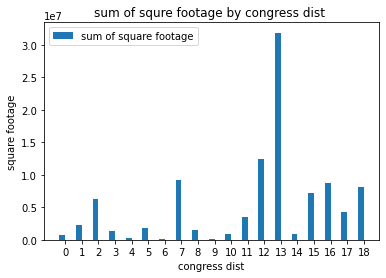

In [5]:
# I preprocess the sum of squre footage by congress dist as example of bar chart here
square_footage = buildings.groupby('Congress Dist')['Square Footage'].sum().reset_index(name='sum')

# matplotlib for bar chart using Pandas
labels = square_footage['Congress Dist']
sum_footage = square_footage['sum']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_footage, width, label='sum of square footage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('square footage')
ax.set_xlabel('congress dist')
ax.set_title('sum of squre footage by congress dist ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

From above, we can see using matplotlib to build a simple statisc bar chart is really simple. However, if we do not have pandas to help matplotlib, the process would tend to be more complex than what we have here. Using pandas, we can have a more simple way to plot the bar chart above:

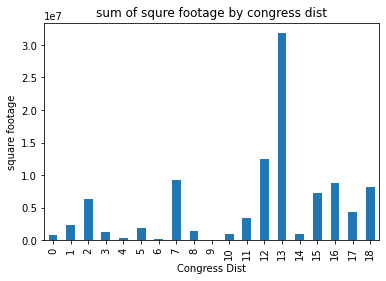

In [6]:
aggregated_data = buildings.groupby("Congress Dist")["Square Footage"].sum()
plt.title("sum of squre footage by congress dist")
plt.ylabel("square footage")
aggregated_data.plot(kind='bar')

1.1.3 Does it have interactivity, and how easy is it?

    Matplotlib itself do have some default UI that can support interactivity such as pan and zoom but these default UI can be difficult to use if you want to fufill some complex interactive image. In most of the cases, interactive visualization in matplotlib are using other GUI toolkits and third party packages[5]. For example in jupyter notebook it still need  %matplotlib notebook to enable the interactive backend of matplotlib.
    
    With other interactive prompt such as ipywidgets, the interactive can become very easy.
    
    Reference:
    
    [5]Matplotlib - interactive. (n.d.). Retrieved October 02, 2020, from https://matplotlib.org/users/interactive.html

Covert matplotlib to interactive windows in jupyter notebook:

In [9]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


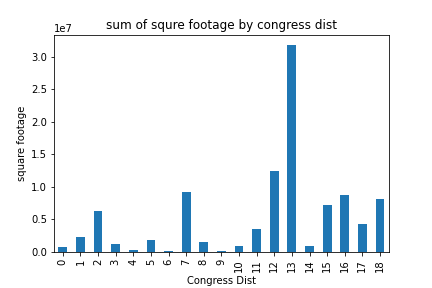

In [10]:
import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

buildings = pd.read_csv('building_inventory.csv',
                        na_values={'Square Footage': 0, 
                         'Year Acquired': 0,
                         'Year Constructed': 0, 
                         'Floors':0}) # this is if the file is stored locally
aggregated_data = buildings.groupby("Congress Dist")["Square Footage"].sum()
plt.title("sum of squre footage by congress dist")
plt.ylabel("square footage")
aggregated_data.plot(kind='bar')

Convert it back

In [11]:
%matplotlib inline

1.1.4 What are the pros and cons of using it?
    
   Personally, I regard matplotlib as a basic library for visualization in python. It is simple to learn, do not require any JS knowledge and can be a great foundation to use other visualization tools that are built on it. 
   
   The biggest shortcoming of matplotlib is interactivity of course. Without other library, building complex interactive plot in matplotlib can be a huge problem.
   
   Unlike other high-level libs, matplotlib enables users to control the tiniest of detail feature which can be great or bad depending on how you regard it. Personally I prefer that the package can help to automatically control some details to get a more beautiful plot. The default matplotlib can be unpleasing compared with other libs.

## 1.2 Evaluation for bqplot

1.2.1 What is the license for bqplot?
     
    According to bqplot's offical github[6], bqplot's is licensed under the Apache License 2.0[7].Such Apache License is another open source licenses which gives user the right to use, modify and redistribute the code just like what we see in the matplotlib's liscense. However, unlike BSD liscense we see before, Apache license specifically states that "Must notify users of code modifications" and "Can’t remove copyright, patent, trademark and attribution notices"[7]

    
    References: 
    
    [6]bqplot/LICENSE (n.d.). Retrieved October 02, 2020, from https://github.com/bqplot/bqplot/blob/master/LICENSE
    
    [7]APACHE LICENSE, VERSION 2.0 (n.d.). Retrieved October 02, 2020, from http://www.apache.org/licenses/LICENSE-2.0


1.2.2 What is the focus of bqplot?

    For the focus of platform for bqplot, it is a 2-D visualization system specifically for Jupyter [8].
    
    For the function of bqplot, it aims at interactive visualization.As the Usage paragraph in the official website states[8], every components of plots in bqplot is an interactive widget that enable users to modify in a very easy way. 
    
    Since the focus of bqplot is interactivity, I am gonna discuss the details in the next question about interactivity.
    
     References: 
    
    [8]bqplot Retrieved October 02, 2020, from https://github.com/bqplot/bqplot

1.2.3 Does it have interactivity, and how easy is it?
    
    Just as what I mentioned in the question above, bqplot is designed for convenient interactivity. In general, there are two ways to use it, the first one is using the pyplot API which has similar settings as matplotlib and the other one is using internal object model in bqplot.
    
    Personally, I feel it is quiet easy to use the pyplot API since the grammer is similar with matplotlib and easy to be used with ipywidget. For the internal object model, I feel like it is more flexible and enble users to set their own style. For a person that do not enjoy looking at so many details, I prefer the pyplot API.
    
    Compared with other libs, I feel bqplot is easier to use than matplotlib but hard to use than bokeh. I am not very familiar with javascript, so I am not gonna compare it with D3.
    
    Here are two examples to get interactive bar charts in bqplopts, I searched for samples in bqplot's official websites but I am not sure whether these are the simplest way to construct plot in bqplots:

Using pyplot API, we can see it has the basic interactive. It is very simple to add interactive components using ipywidgets to the plot.

In [12]:
from bqplot import pyplot

# I preprocess the sum of squre footage by congress dist as example of bar chart here
square_footage = buildings.groupby('Congress Dist')['Square Footage'].sum().reset_index(name='sum')
labels = square_footage['Congress Dist']
sum_footage = square_footage['sum']


fig = pyplot.figure(title="sum of squre footage by congress dist")

bar_chart  = pyplot.bar(x = labels, y= sum_footage)

bar_chart.colors = ["tomato"]

pyplot.xlabel("congress dist")
pyplot.ylabel("square footage")


pyplot.show()

This interaction does not have any meaning. I just want to have a try:

In [13]:
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
from traitlets import link

from ipywidgets import ToggleButtons, VBox, HTML

# I preprocess the sum of squre footage by congress dist as example of bar chart here
square_footage = buildings.groupby('Congress Dist')['Square Footage'].sum().reset_index(name='sum')
labels = square_footage['Congress Dist']
sum_footage = square_footage['sum']

 
brush_x = bqplot.LinearScale()
brush_y = bqplot.LinearScale()

bar_charts = bqplot.Bars(x=labels, y=sum_footage,
                scales={'x': brush_x, 'y': brush_y})

sc_xax = bqplot.Axis(label=("congress dist"), scale=brush_x)
sc_yax = bqplot.Axis(label=("sum"), scale=brush_y, orientation='vertical')

br_sel = BrushSelector(x_scale= brush_x, y_scale= brush_y, marks=[bar_charts])

db_brush = HTML(value=str(br_sel.selected))

def brush_callback(change):
    db_brush.value = str(br_sel.selected)
    

br_sel.observe(brush_callback, names=['brushing'])

fig_brush_sel = bqplot.Figure(marks=[bar_charts], axes=[sc_xax, sc_yax],
                       title='sum of squre footage by congress dist', interaction=br_sel)

VBox([db_brush, fig_brush_sel])

1.2.4 What are the pros and cons of using it?
    
    It is great for jupyternotebook that does not require magic % before using interactive plot. It is very great for interactive plot and can binds the chart.
    
    I am not sure about the shortcoming of it. Maybe the platform support is a issue since it only works on jupyter enviroments and other packages such as matplotlib support multiple environment from python to matlib.

## 1.3 Evaluation for Bokeh

1.3.1 What is the license for Bokeh?

    According to Bokeh's official document[9], Bokeh uses the traditional 3-clause BSD license[10] which is a special BSD license. Comparing to the Zero-Clause BSD license that matplotlib follows, there are three additional requirments for users to follow if users want to use, midification or redistribute the code. I copy the three requirments from the official websites listed as follow:


    “Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

    Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

    Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

    Neither the name of Anaconda nor the names of any contributors may be used to endorse or promote products derived from this software without specific prior written permission.”
    
    The first two requirments come from the 2-clause BSD license. Compared to Apache Liscens that bqplot use, Bokeh's liscense more focus on the copyright notice and do not require code modifications noticw.

    References: 

    [9]Welcome to Bokeh. (n.d.). Retrieved October 02, 2020, from https://docs.bokeh.org/en/0.10.0/
    
    [10]The 3-Clause BSD License (n.d.). Retrieved October 02, 2020, from https://opensource.org/licenses/BSD-3-Clause


1.3.2 What is the focus of Bokeh?
    
    From the bokeh's official website[9],we know bokeh focus on interactive visualization especailly with large dynamic or streaming data. Compared with bqplot which focus on interactive visualization too, bokeh shows better effitiancy towards large scale of data. I have not compare their ability towards dynamic data, since both of them have bind the data with the plot automatically.


    Since bokeh's focus is interactivity, the details will be discussed in the next question.

1.3.3 Does it have interactivity, and how easy is it?

    I tried the simplest interactive plot for bqplot and bokeh. Personally, I would say bokeh is easier to use than bqplot (maybe just because I am not familiar with bqplot enough). Bokeh defenetly provides a friendlier experience for first-timers.  I have tried the interactive bar chart as follow. It is really helpful since the interactive only takes one line of "p.add_tools(HoverTool(tooltips=[("congress dist", "@labels"), ("sum of footage", "@sum_footage")]))". There are many interactive models in bokeh that can be used directly, comparing with bqplot above that need extra settings for interactive components.

In [14]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [15]:

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap



# I preprocess the sum of squre footage by congress dist as example of bar chart here
square_footage = buildings.groupby('Congress Dist')['Square Footage'].sum().reset_index(name='sum')
labels = square_footage['Congress Dist'].astype(str).tolist()
sum_footage = square_footage['sum'].tolist()

source = ColumnDataSource(data=dict(labels=labels, sum_footage=sum_footage))

p = figure(plot_width=800, plot_height=300, title="sum of squre footage by congress dist ",
           x_range=labels, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "congress dist"
p.xaxis.major_label_orientation = 1.2


p.vbar(x='labels', top='sum_footage', width=1, source=source,
       line_color="white", 
       hover_line_color="darkgrey", hover_fill_color="yellow")

p.add_tools(HoverTool(tooltips=[("congress dist", "@labels"), ("sum of footage", "@sum_footage")]))

show(p)

1.3.4 What are the pros and cons of using it?
    
    The most wonderful thing I found about Bokeh is its tools. I really like those tools that enable users to choose from a bunch of interactivities for the plot. It is really simple and elegant to use comparing to other libs. I guess the efficiancy may be a great advantage of bokeh but I do not test it on my computer since I do not have large data sets.
    
    The first shortcoming I found in bokeh is that it does not work with other libs such as pandas. I have to transfer my data into string list before to use it as x-axis in bokeh's bar chart. The other thing is about the tools too. The tools helps and tools limits. If user want more special interactivity, it may be hard to do with Bokeh.
    
    There are many cons I found online about Bokeh but I do not run into them myself since I have just started to use it. These cons include: not supporting 3D plot, not resize the plot according to the screen, not support hover tools to lines[11].
    
    Reference:
       
    [11]Visualization of Plots for Your Website,Shiri Avni (5 January 2019). Retrieved October 02, 2020, from https://www.inquisitivemuggles.com/code/2019/01/05/bokeh-pyplot.html


## 1.4 Evaluation for D3

1.4.1 What is the license for D3?

    According to D3's offical github[12], D3 follows the 3-clause BSD liscens just like Bokeh. Since it is the same kind of liscense we discussed above, I do not want to repeat the clause agian.

    References:

    [12]d3/LICENSE (n.d.). Retrieved October 02, 2020, from https://github.com/d3/d3/blob/master/LICENSE

1.4.2 What is the focus of D3?
    
    According to d3's offical website[13], "D3.js is a JavaScript library for manipulating documents based on data."
    
    It is very clear that D3 focus only on JaveScript comparing to other three above which are design for python.
    
    What makes D3 so powerful is its "Data-driven". D3 enables users to bind data to elements thus user can add elements dynamically when they modify the data sets. 
    
    It also support lots of interactivities.

    References:
    
    [13]d3 (n.d.). Retrieved October 02, 2020, from https://d3js.org/

1.4.3 Does it have interactivity, and how easy is it?

    Yes, D3 supports lots of interactivities with data driven strategy. Compared to the simple code required for Bokeh which we can see above, there are more complex code for D3. And since I know nothing about Javascript, it took me a while to understand the code for D3, especially to construct D3 code in this jupyter notebook.
    

In [16]:
from IPython.core.display import display, HTML
from string import Template
import pandas as pd
import json, random

In [33]:
HTML('<script src="./d3.min.js"></script>')

In [34]:
#HTML templet
html_template = Template('''
<style> $css_text </style>
<div id="graph-div"></div>
<script> $js_text </script>
''')

In [35]:
# Css templet
css_text = '''

.bar {
  fill: steelblue;
}

.bar:hover {
  fill: brown;
}

.axis {
  font: 10px sans-serif;
}

.axis path,
.axis line {
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}

.x.axis path {
  display: none;
}

'''

In [36]:
#Java script templet
js_text_template = Template('''

var margin = {top: 20, right: 20, bottom: 30, left: 100},
    width = 500 - margin.left - margin.right,
    height = 300 - margin.top - margin.bottom;

var x = d3.scale.ordinal()
    .rangeRoundBands([0, width], .1);

var y = d3.scale.linear()
    .range([height, 0]);

var xAxis = d3.svg.axis()
    .scale(x)
    .orient("bottom");

var yAxis = d3.svg.axis()
    .scale(y)
    .orient("left");

var svg = d3.select("#graph-div").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var data = $data ;

  x.domain(data.map(function(d) { return d.Dist; }));
  y.domain([0, d3.max(data, function(d) { return d.sum; })]);

  svg.append("g")
      .attr("class", "x axis")
      .attr("transform", "translate(0," + height + ")")
      .call(xAxis);

  svg.append("g")
      .attr("class", "y axis")
      .call(yAxis);

  svg.selectAll(".bar")
      .data(data)
    .enter().append("rect")
      .attr("class", "bar")
      .attr("x", function(d) { return x(d.Dist); })
      .attr("width", x.rangeBand())
      .attr("y", function(d) { return y(d3.format("~s")(d.sum)); })
      .attr("height", function(d) { return height - y(d.sum); });

''')

In [37]:
js_text_2 = Template('''

var bars = svg.selectAll(".bar").data($data);
  
bars
  .transition()
    .attr("y", function(d) { return y(d.sum); })
    .attr("height", function(d) { return height - y(d.sum); });

''')

In [38]:
# I preprocess the sum of squre footage by congress dist as example of bar chart here
square_footage = buildings.groupby('Congress Dist')['Square Footage'].sum().reset_index(name='sum')
labels = square_footage['Congress Dist']
sum_footage = square_footage['sum']


data = pd.DataFrame({'Dist': labels.tolist(), 'sum': sum_footage.tolist()})

data.head()

#data = pd.DataFrame({'Dist': ['A','B','C','D'], 'sum': [1,1,1,1]})
#data.head()

,Dist,sum
0,0,793124.0
1,1,2351762.0
2,2,6285684.0
3,3,1293687.0
4,4,317741.0


In [39]:
js_text = js_text_template.substitute({'data': json.dumps(data.to_dict(orient='records'))})
HTML(html_template.substitute({'css_text': css_text, 'js_text': js_text}))

In [88]:
data['sum'] = [random.uniform(0,3440241) for d in data['sum']]
js= js_text_2.substitute({'data': json.dumps(data.to_dict(orient='records'))})
HTML('<script>' + js + '</script>')

I got a problem from this part.

The d3 code works only with local file of d3.js

If I try to use the https://d3js.org/d3.v6.min.js, it fails.

1.4.4 What are the pros and cons of using it?

    D3 allows users to control everything in the plot which could be pros or cons depends on how users want to use it. I really don't like all the details I have to set for Javascript.
    
    The best thing about D3 is that it can be easily modified using data. It also have alot build in interactive componets too like mouse catching.
    
    What I dislike about D3 is that it is based on Javascript. It is really hard to learn and understand the transitions.

## Part 2 :

 ### my index website : https://vaneness1998.github.io/YeFeng.github.io/

### my github page : https://github.com/Vaneness1998/YeFeng.github.io